Download  train-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\train-images-idx3-ubyte.gz ...
pass
Download  train-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\train-labels-idx1-ubyte.gz ...
pass
Download  t10k-images-idx3-ubyte.gz ...
pass
Extract MNIST_data\t10k-images-idx3-ubyte.gz ...
pass
Download  t10k-labels-idx1-ubyte.gz ...
pass
Extract MNIST_data\t10k-labels-idx1-ubyte.gz ...
pass
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0

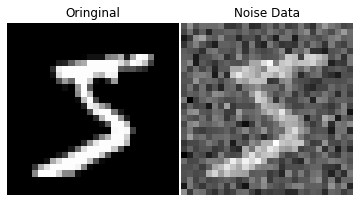

[Iteration     0] Wide CNN : Loss=2.3326 | Acc=0.156
[Iteration     0] Deep CNN : Loss=2.3061 | Acc=0.203
[Iteration   100] Wide CNN : Loss=2.0850 | Acc=0.609
[Iteration   100] Deep CNN : Loss=2.2724 | Acc=0.359
[Iteration   200] Wide CNN : Loss=1.6725 | Acc=0.734
[Iteration   200] Deep CNN : Loss=2.2143 | Acc=0.453
[Iteration   300] Wide CNN : Loss=1.3794 | Acc=0.766
[Iteration   300] Deep CNN : Loss=2.1094 | Acc=0.531
[Iteration   400] Wide CNN : Loss=1.2025 | Acc=0.781
[Iteration   400] Deep CNN : Loss=1.9875 | Acc=0.609
[Iteration   500] Wide CNN : Loss=0.8081 | Acc=0.828
[Iteration   500] Deep CNN : Loss=1.6029 | Acc=0.688
[Iteration   600] Wide CNN : Loss=0.7081 | Acc=0.812
[Iteration   600] Deep CNN : Loss=1.3119 | Acc=0.734
[Iteration   700] Wide CNN : Loss=0.5713 | Acc=0.812
[Iteration   700] Deep CNN : Loss=1.0175 | Acc=0.750
[Iteration   800] Wide CNN : Loss=0.5901 | Acc=0.891
[Iteration   800] Deep CNN : Loss=0.8897 | Acc=0.781
[Iteration   900] Wide CNN : Loss=0.8665 | Acc

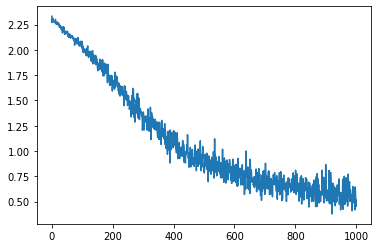

Deep CNN Total Accuracy: 0.8313


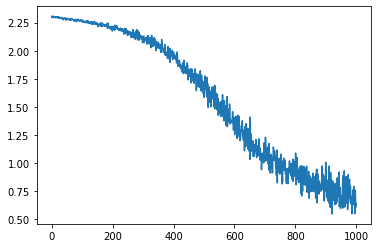

#=========================Reconstruction Results of Normal AutoEncoder============================#

Layer1,3,5,7:origin  Layer2,4,6,8:reconstruct result


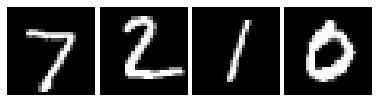

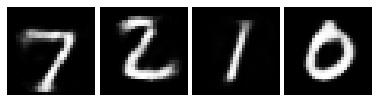

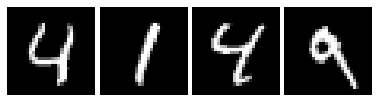

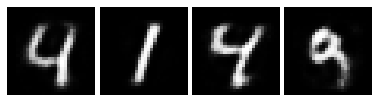

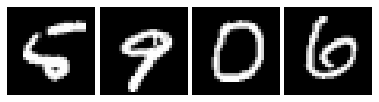

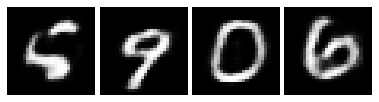

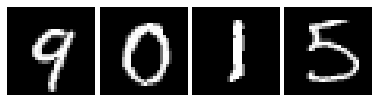

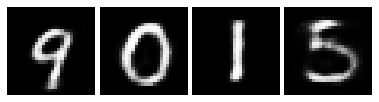

#=========================Filters of Normal AutoEncoder============================#



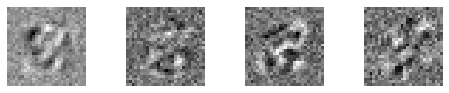

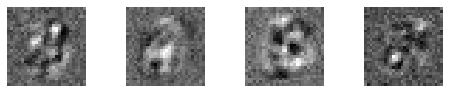

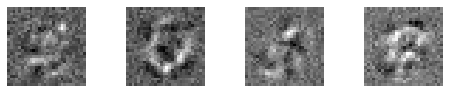

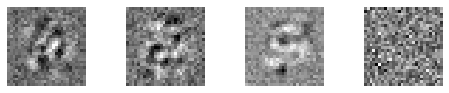

#=========================Reconstruction Results of AutoEncoder with denoise and dropout============================#

Layer1,3,5,7:origin  Layer2,4,6,8:reconstruct result


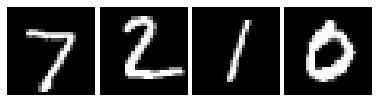

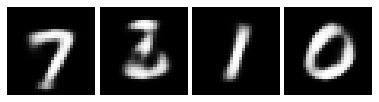

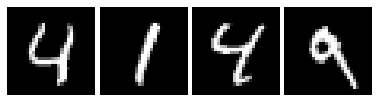

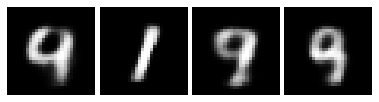

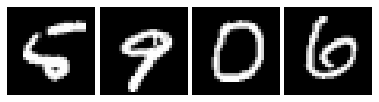

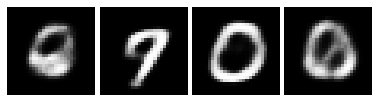

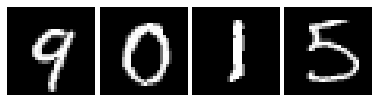

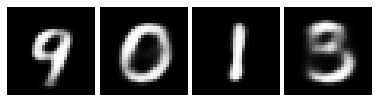

#=========================Filters of AutoEncoder with denoise and dropout============================#



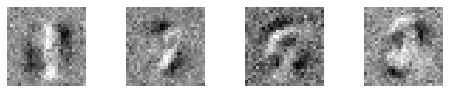

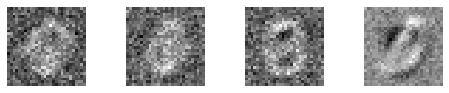

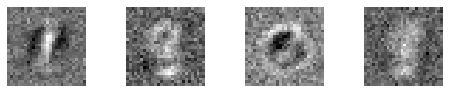

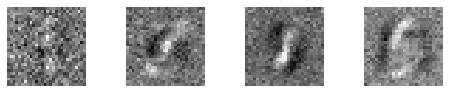

In [7]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import MNISTtools
import NeuralNetwork
import pylab
np.set_printoptions(threshold=sys.maxsize)
def OneHot(y):
    y_one_hot = np.eye(10, dtype=np.float32)[y]
    return y_one_hot

def AE_OneHot(y):
    y_one_hot = np.eye(784, dtype=np.float32)[y]
    return y_one_hot

def Accuracy(y,y_):
    y_digit = np.argmax(y,1)
    #print(y_digit)
    y_digit_ = np.argmax(y_,1)
    temp = np.equal(y_digit, y_digit_).astype(np.float32)
    return np.sum(temp) / float(y_digit.shape[0])

if __name__ == "__main__":
    # Dataset
    MNISTtools.downloadMNIST(path='MNIST_data', unzip=True)
    x_train, y_train = MNISTtools.loadMNIST(dataset="training", path="MNIST_data")
    x_test, y_test = MNISTtools.loadMNIST(dataset="testing", path="MNIST_data")

    # Show Data and Label
    print(x_train[0])
    print(y_train[0])
    #plt.imshow(x_train[0].reshape((28,28)), cmap='gray')
    #plt.show()
    
    x_noise = x_train + 65*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    #plt.imshow(x_noise[0].reshape((28,28)), cmap='gray')
    #plt.show()
    plt.subplot(1, 2, 1)
    plt.title( 'Oringinal' )
    plt.imshow(x_train[0].reshape((28,28)), cmap='gray')
    plt.axis( 'off' )
    plt.subplot(1, 2, 2)
    plt.title( 'Noise Data' )
    plt.imshow(x_noise[0].reshape((28,28)), cmap='gray')
    plt.axis( 'off' )
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.01, hspace=0.2) 
    plt.show()
    # todo (Data Processing)
    x_train = x_train.astype(np.float32) / 255.
    x_noise = x_noise.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255.
    y_train = OneHot(y_train)
    y_test = OneHot(y_test)
    #print(x_train[0].size)
    
    # todo (Create NN Model)
    nn = NeuralNetwork.NN(784,256,10,"softmax")
    dnn = NeuralNetwork.DNN(784,204,202,10,"softmax")
    ae = NeuralNetwork.NN(784,128,784,"sigmoid")
    dae = NeuralNetwork.NN(784,128,784,"sigmoid")
    # Training the Model
    loss_rec = []
    d_loss_rec = []
    batch_size = 64
    for i in range(1001):
           
        # todo (Sample Data Batch)
        batch_id = np.random.choice(x_train.shape[0], batch_size)
        x_batch = x_train[batch_id]
        x_noisy = x_noise[batch_id]
        y_batch = y_train[batch_id]
        #print(x_batch[0].size)
        #plt.imshow(x_batch[0].reshape((28,28)), cmap='gray')
        #plt.show()

        # todo (Forward & Backward & Update)
        nn.feed({"x":x_batch, "y":y_batch})
        nn.forward()
        nn.backward()
        nn.update(1e-2)
        
        dnn.feed({"x":x_batch, "y":y_batch})
        dnn.forward()
        dnn.backward()
        dnn.update(1e-2)
        
        ae.feed({"x":x_batch, "y":x_batch})
        ae.forward()
        ae.backward()
        ae.update(1e-2)
        
        dae.feed({"x":x_noisy, "y":x_batch})
        dae.drop_forward()
        dae.drop_backward()
        dae.update(1e-2)
        
        
        # todo (Loss)
        loss = nn.computeLoss()
        loss_rec.append(loss)
        
        d_loss = dnn.computeLoss()
        d_loss_rec.append(d_loss)
        
        a_loss = ae.computeLoss()
        da_loss = dae.computeLoss()
        
          
        # todo (Evaluation)
        batch_id = np.random.choice(x_test.shape[0], batch_size)
        x_test_batch = x_test[batch_id]
        y_test_batch = y_test[batch_id]
        nn.feed({"x":x_test_batch})
        y_test_out = nn.forward()
        acc = Accuracy(y_test_out, y_test_batch)
        
        dnn.feed({"x":x_test_batch})
        d_y_test_out = dnn.forward()
        d_acc = Accuracy(d_y_test_out, y_test_batch)
        
        ae.feed({"x":x_test_batch})
        a_y_test_out = ae.forward()
        a_acc = Accuracy(a_y_test_out, x_test_batch)
        
        dae.feed({"x":x_test_batch})
        da_y_test_out = ae.forward()
        da_acc = Accuracy(da_y_test_out, x_test_batch)
            
        if i%100 == 0:
            print("\r[Iteration {:5d}] Wide CNN : Loss={:.4f} | Acc={:.3f}".format(i,loss,acc))
            print("\r[Iteration {:5d}] Deep CNN : Loss={:.4f} | Acc={:.3f}".format(i,d_loss,d_acc))
    
    nn.feed({"x":x_test})
    y_prob = nn.forward()
    
    dnn.feed({"x":x_test})
    d_y_prob = dnn.forward()
    
    total_acc = Accuracy(y_prob, y_test)
    d_total_acc = Accuracy(d_y_prob, y_test)
    
    print("Wide CNN Total Accuracy:", total_acc)
    plt.plot(loss_rec)
    plt.show()
    
    print("Deep CNN Total Accuracy:", d_total_acc)
    plt.plot(d_loss_rec)
    plt.show()
    
    ae.feed({"x":x_test})
    img1 = ae.forward()
    ae_filter = ae.return_filter()
    dae.feed({"x":x_test})
    img2 = dae.forward()
    dae_filter = dae.return_filter()
    
    print("#=========================Reconstruction Results of Normal AutoEncoder============================#\n")
    print("Layer1,3,5,7:origin  Layer2,4,6,8:reconstruct result")
    j = 0
    k = 0
    for i in range(32):
        if(int(i/4)%2 == 0):
            plt.subplot(4, 8, k+1)
            plt.subplots_adjust(left=0.1, bottom=0.1, right=1.8, top=1.8, wspace=0.05, hspace=0.01)
            plt.imshow(x_test[k].reshape((28,28)), cmap='gray')
            plt.axis( 'off' )
            k+=1
        elif(int(i/4)%2 == 1):
            plt.subplot(4, 8, j+1)
            plt.subplots_adjust(left=0.1, bottom=0.1, right=1.8, top=1.8, wspace=0.05, hspace=0.01)
            plt.imshow(img1[j].reshape((28,28)), cmap='gray')
            plt.axis( 'off' )
            j+=1
        if(int(i+1)%4 == 0):
            plt.show()
    j = k = 0      
    print("#=========================Filters of Normal AutoEncoder============================#\n")
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.2, wspace=0.0, hspace=0.01)
        plt.imshow(ae_filter.T[i].reshape((28,28)), cmap='gray')
        plt.axis( 'off' )
        if(int(i+1)%4 == 0):
            plt.show()
    print("#=========================Reconstruction Results of AutoEncoder with denoise and dropout============================#\n")
    print("Layer1,3,5,7:origin  Layer2,4,6,8:reconstruct result")
    for i in range(32):
        if(int(i/4)%2 == 0):
            plt.subplot(4, 8, k+1)
            plt.subplots_adjust(left=0.1, bottom=0.1, right=1.8, top=1.8, wspace=0.05, hspace=0.01)
            plt.imshow(x_test[k].reshape((28,28)), cmap='gray')
            plt.axis( 'off' )
            k+=1
        elif(int(i/4)%2 == 1):
            plt.subplot(4, 8, j+1)
            plt.subplots_adjust(left=0.1, bottom=0.1, right=1.8, top=1.8, wspace=0.05, hspace=0.01)
            plt.imshow(img2[j].reshape((28,28)), cmap='gray')
            plt.axis( 'off' )
            j+=1
        if(int(i+1)%4 == 0):
            plt.show()
    print("#=========================Filters of AutoEncoder with denoise and dropout============================#\n")
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.2, wspace=0.0, hspace=0.01)
        plt.imshow(dae_filter.T[i].reshape((28,28)), cmap='gray')
        plt.axis( 'off' )
        if(int(i+1)%4 == 0):
            plt.show()
    
    
    
